In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Dropout, Activation, BatchNormalization
from keras import Sequential
import keras
from keras.utils import to_categorical
from keras.models import model_from_json
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline

Using TensorFlow backend.


In [3]:
#Load CIFAR10 Dataset, split between train and test sets:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(np.unique(labels))

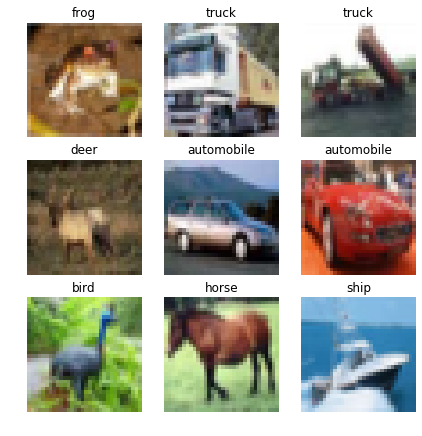

In [5]:
#Examples random images
fig = plt.figure(figsize=(8, 6))
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # plot raw pixel data
    plt.imshow(X_train[i])
    plt.title(labels[int(y_train[i])])
    plt.subplots_adjust(bottom=0.1, right=0.8, top=1)
    plt.axis('off')
# show the figure
plt.show()

#### Data pre-processing

In [6]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [7]:
X_train = X_train.astype('float32')
X_train = X_train/255
X_test = X_test.astype('float32')
X_test = X_test/255

In [8]:
# Convert class vectors to binary class matrices
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

y_train[39]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

#### Function to plot model accuracy and loss

In [9]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
     # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

#### Compute test accuracy

In [10]:
def accuracy(X_test, y_test, model):
    result = model.predict(X_test)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(y_test, axis=1)
    num_correct = np.sum(predicted_class == true_class) #TP
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

#### Convolutional Neural Network

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 142s 3ms/step - loss: 1.6238 - acc: 0.4291 - val_loss: 1.2804 - val_acc: 0.5370
Epoch 2/50
50000/50000 [==============================] - 125s 3ms/step - loss: 1.2011 - acc: 0.5706 - val_loss: 1.0273 - val_acc: 0.6381
Epoch 3/50
50000/50000 [==============================] - 116s 2ms/step - loss: 1.0131 - acc: 0.6463 - val_loss: 1.1680 - val_acc: 0.6070
Epoch 4/50
50000/50000 [==============================] - 124s 2ms/step - loss: 0.9057 - acc: 0.6850 - val_loss: 0.8669 - val_acc: 0.6979
Epoch 5/50
50000/50000 [==============================] - 123s 2ms/step - loss: 0.8168 - acc: 0.7143 - val_loss: 0.8051 - val_acc: 0.7190
Epoch 6/50
50000/50000 [==============================] - 125s 3ms/step - loss: 0.7624 - acc: 0.7326 - val_loss: 0.7446 - val_acc: 0.7477
Epoch 7/50
50000/50000 [==============================] - 123s 2ms/step - loss: 0.7100 - acc: 0.7510 - val_loss: 0.7381 - 

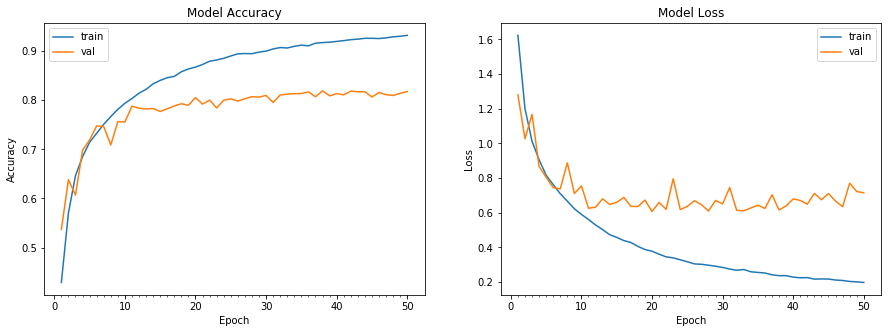

Model took 6082.96 seconds to train
Accuracy on test data is: 81.76


In [12]:
# Define the model
model = Sequential() 


model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu' ))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# Train the model
start = time.time()
model_info= model.fit(X_train, y_train,
              batch_size=100,
              epochs=50,
              validation_data=(X_test, y_test),
              shuffle=True, verbose=1)


end = time.time()
# plot model history
plot_model_history(model_info)
print ("Model took %0.2f seconds to train"%(end - start))
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(X_test, y_test, model))

In [13]:
# serialize model to JSON
model_json = model.to_json()
with open('model_cifar10.json', 'w') as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights('model_cifar10.h5')
print('Saved model to disk')

Saved model to disk
